In [318]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [319]:
### Getting ticker 
water = ['MSEX','CWT','AWR','ARTNA','WTRG','SJW','YORW',
         'XYL','PNR','AQUA','ECL','TTEK','ITRI',"AOS",'AWK',
        "GWRS","CDZI",'CDZIP','CWCO','HCCI','IEA','MSEX',
         'MYRG','PRIM','PCYO','VWTR','AMRC','ARIS','DY','MTZ',
         'NES.AX','SBS','SJW','WTRG','ZWS','^GSPC']
Water = []
for i in water:
    if i not in Water:
        Water.append(i)
 

# remove new stocks
Water.remove('CDZIP')
Water.remove('ARIS')
len(Water)

31

In [320]:
#
portfolio = pd.DataFrame()

# Setting time
# now = datetime.datetime.now()
# now.strftime("%Y-%m-%d")
end_date = '2022-03-25'
start_date = "2018-01-01"

# Grasping stock prices from Yahoo finance 
for column in Water:
    portfolio[column] = yf.download(column,start_date,end_date).loc[:,'Adj Close']

# Dropping NA and checking the first 10 rows 
#portfolio = portfolio.fillna(0)
#portfolio = portfolio.dropna(axis = 1).rename(columns = {'^GSPC':"S&P500"})
portfolio = portfolio.rename(columns = {'^GSPC':"S&P500"})
#portfolio.head(n = 10)

# Checking informarion of dataset
portfolio.info()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

-  CDZIP & ARIS  need to be Identified

In [321]:
# Get data of two new stocks
CDZIP = yf.download('CDZIP',end_date = end_date).loc[:,'Adj Close'].to_frame().rename(columns ={"Adj Close":'CDZIP'})
ARIS = yf.download('ARIS',end_date = end_date).loc[:,'Adj Close'].to_frame().rename(columns ={"Adj Close":'ARIS'})

# Daily Return
CDZIP_d = np.log(CDZIP/CDZIP.shift(1))
CDZIP_d = CDZIP_d.dropna()

ARIS_d = np.log(ARIS/ARIS.shift(1))
ARIS_d = ARIS_d.dropna()

# Weekly Return
CDZIP_w = CDZIP_d.resample("W").agg(lambda x: (x + 1).prod() - 1)
ARIS_w = ARIS_d.resample('W').agg(lambda x: (x + 1).prod() - 1)

# Monthly Return 
CDZIP_m = CDZIP_d.resample("M").agg(lambda x: (x + 1).prod() - 1)
ARIS_m = ARIS_d.resample('M').agg(lambda x: (x + 1).prod() - 1)

#
CDZIP_e = CDZIP_m.mean()
CDZIP_s = CDZIP_m.mean()/CDZIP_m.std()

ARIS_e = ARIS_m.mean()
ARIS_s = ARIS_m.mean()/ARIS_m.std()

# Calculating Price Index
CDZIP_index = pd.DataFrame()
CDZIP_index = CDZIP/CDZIP.iloc[0,0]
ARIS_index = pd.DataFrame()
ARIS_index = ARIS/ARIS.iloc[0,0]

#
print("Expected_Return of CDZIP:",CDZIP_e)
print("Sharpe Ratio of CDZIP:",CDZIP_s)
print(32*"-")
print("Expected_Return of ARIS:",ARIS_e)
print("Sharpe Ratio of ARIS:",ARIS_s)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Expected_Return of CDZIP: CDZIP   -0.053007
dtype: float64
Sharpe Ratio of CDZIP: CDZIP   -0.578997
dtype: float64
--------------------------------
Expected_Return of ARIS: ARIS    0.045722
dtype: float64
Sharpe Ratio of ARIS: ARIS    0.263593
dtype: float64


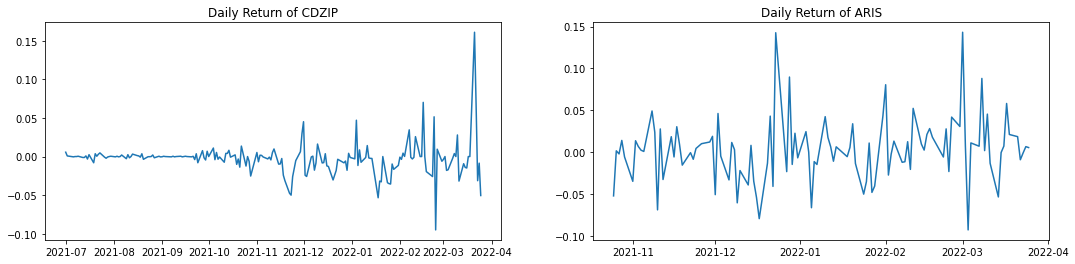

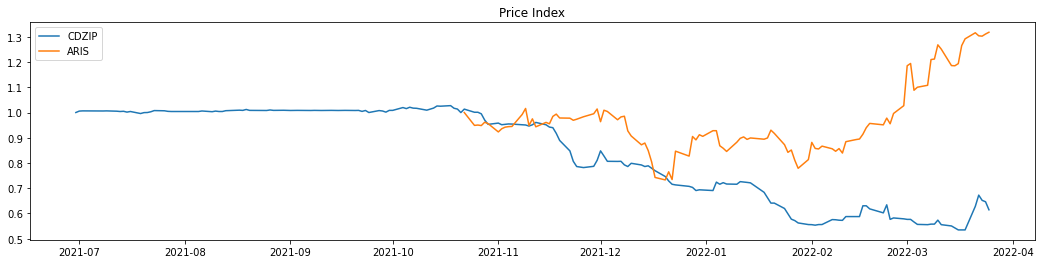

In [322]:
#
plt.figure(figsize=(18,4))
# Daily Returns
plt.subplot(1,2,1)
plt.plot(CDZIP_d)
plt.title("Daily Return of CDZIP")

plt.subplot(1,2,2)
plt.plot(ARIS_d)
plt.title("Daily Return of ARIS")

#
plt.figure(figsize=(18,4))
# create x data
x_data = CDZIP_index.index
# create figure and axis
plt.subplot()
plt.plot(x_data,CDZIP_index,label = 'CDZIP')
x_data = ARIS_index.index
plt.plot(x_data,ARIS_index,label = 'ARIS')
# set title and legend
plt.title('Price Index')
plt.legend()
plt.show()


In [597]:
# daily returns
daily_returns = np.log(portfolio/portfolio.shift(1))
daily_returns = daily_returns.dropna()

# weekly returns 
weekly_returns = daily_returns.resample('W').agg(lambda x: (x + 1).prod() - 1)

# Monthly returns
monthly_returns = daily_returns.resample('M').agg(lambda x: (x + 1).prod() - 1)

# Annual returns 
Annual_returns = daily_returns.resample('Y').agg(lambda x: (x + 1).prod() - 1)

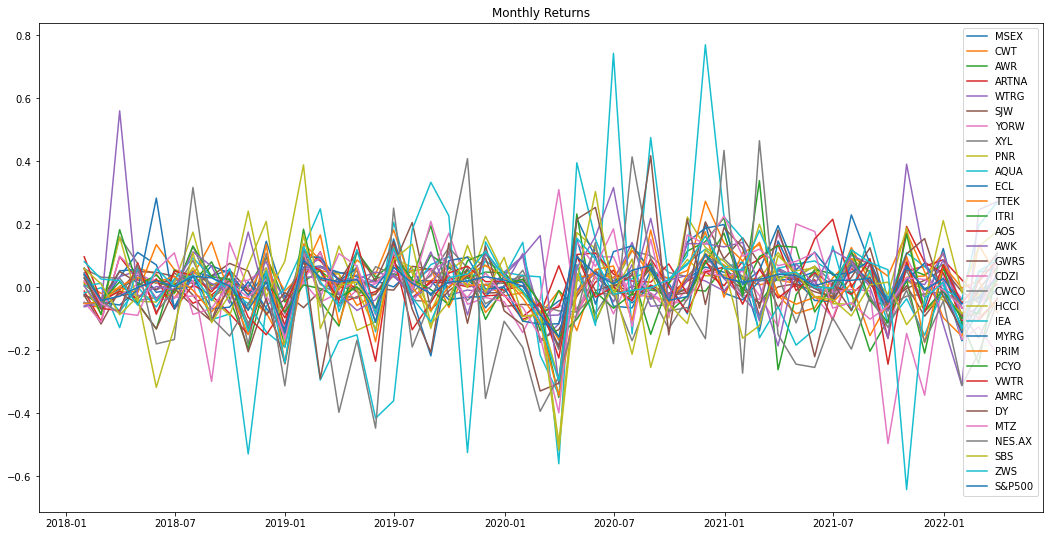

In [324]:
# get columns to plot
columns = monthly_returns.columns#.drop(['xxxx'])
# create x data
x_data = monthly_returns.index
# create figure and axis
fig, ax = plt.subplots(figsize = (18,9))
# plot each column
for column in columns:
    ax.plot(x_data, monthly_returns[column], label=column)
# set title and legend
ax.set_title('Monthly Returns')
ax.legend()

plt.show()

In [325]:
# Calculating Price Index
price_index = pd.DataFrame()
i = 0
for column in portfolio.columns:
    price_index[column] = portfolio[column]/portfolio.iloc[0,i]
    i += 1 
price_index.head(n = 5)

,MSEX,CWT,AWR,ARTNA,WTRG,SJW,YORW,XYL,PNR,AQUA,...,PRIM,PCYO,VWTR,AMRC,DY,MTZ,NES.AX,SBS,ZWS,S&P500
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-03,0.984139,0.989933,0.999113,1.013937,0.989909,0.990547,0.977511,1.012193,1.008116,0.997901,...,0.989811,0.994012,0.992063,1.011494,1.007438,0.996004,1.095238,0.990575,1.009238,1.006399
2018-01-04,0.977232,0.980984,0.990780,1.032163,0.980078,0.974003,0.974513,1.018951,1.033034,0.996222,...,0.991630,0.994012,0.996032,1.034483,1.017295,0.997003,1.095238,0.965127,1.013857,1.010453
2018-01-05,0.963674,0.973154,0.984397,1.021710,0.975679,0.958248,0.982009,1.017041,1.034601,1.009656,...,0.979258,1.000000,0.996032,1.005747,1.012008,0.993007,1.095238,0.980207,1.013472,1.017561
2018-01-08,1.002302,0.987696,1.001596,1.122755,0.975679,0.968647,0.988006,1.020714,1.033604,1.040302,...,0.980713,1.035928,0.992063,0.919540,1.025092,1.007992,1.095238,0.995288,1.066205,1.019252


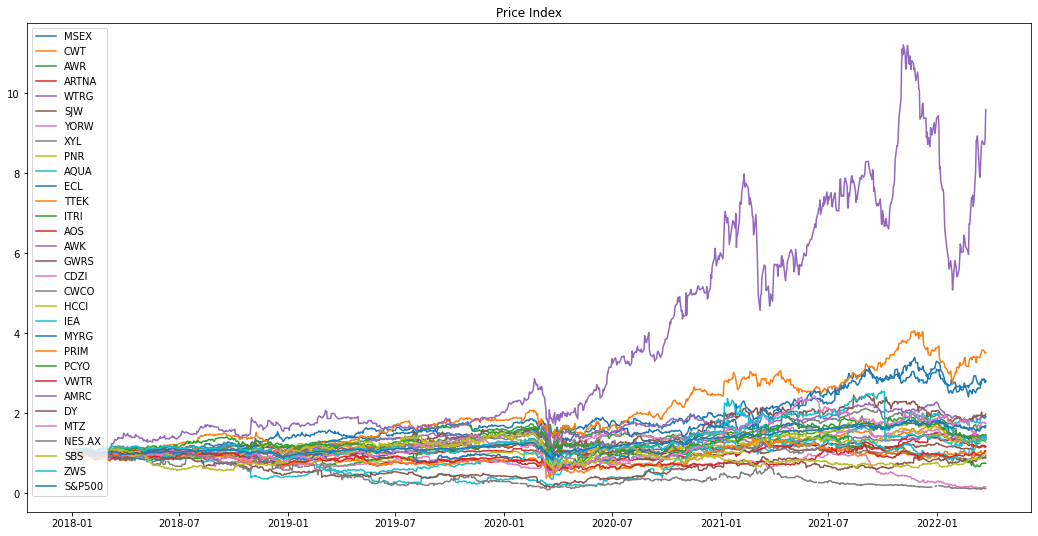

In [326]:
# get columns to plot
columns = price_index.columns#.drop(['xxxx'])
# create x data
x_data = price_index.index
# create figure and axis
fig, ax = plt.subplots(figsize=(18,9))
# plot each column
for column in columns:
    ax.plot(x_data, price_index[column], label=column)
# set title and legend
ax.set_title('Price Index')
ax.legend()
plt.show()

- AMRC has grown tenfold in the past 5 years.
- MSEX has grown triple in the past 5 years.
- TTEK has grown quadrupled. 
- AWR,AWK,GWRS and MYRG all have doubled their values in the past 5 years.
- While S&p500 only has increased by 1.8 times.

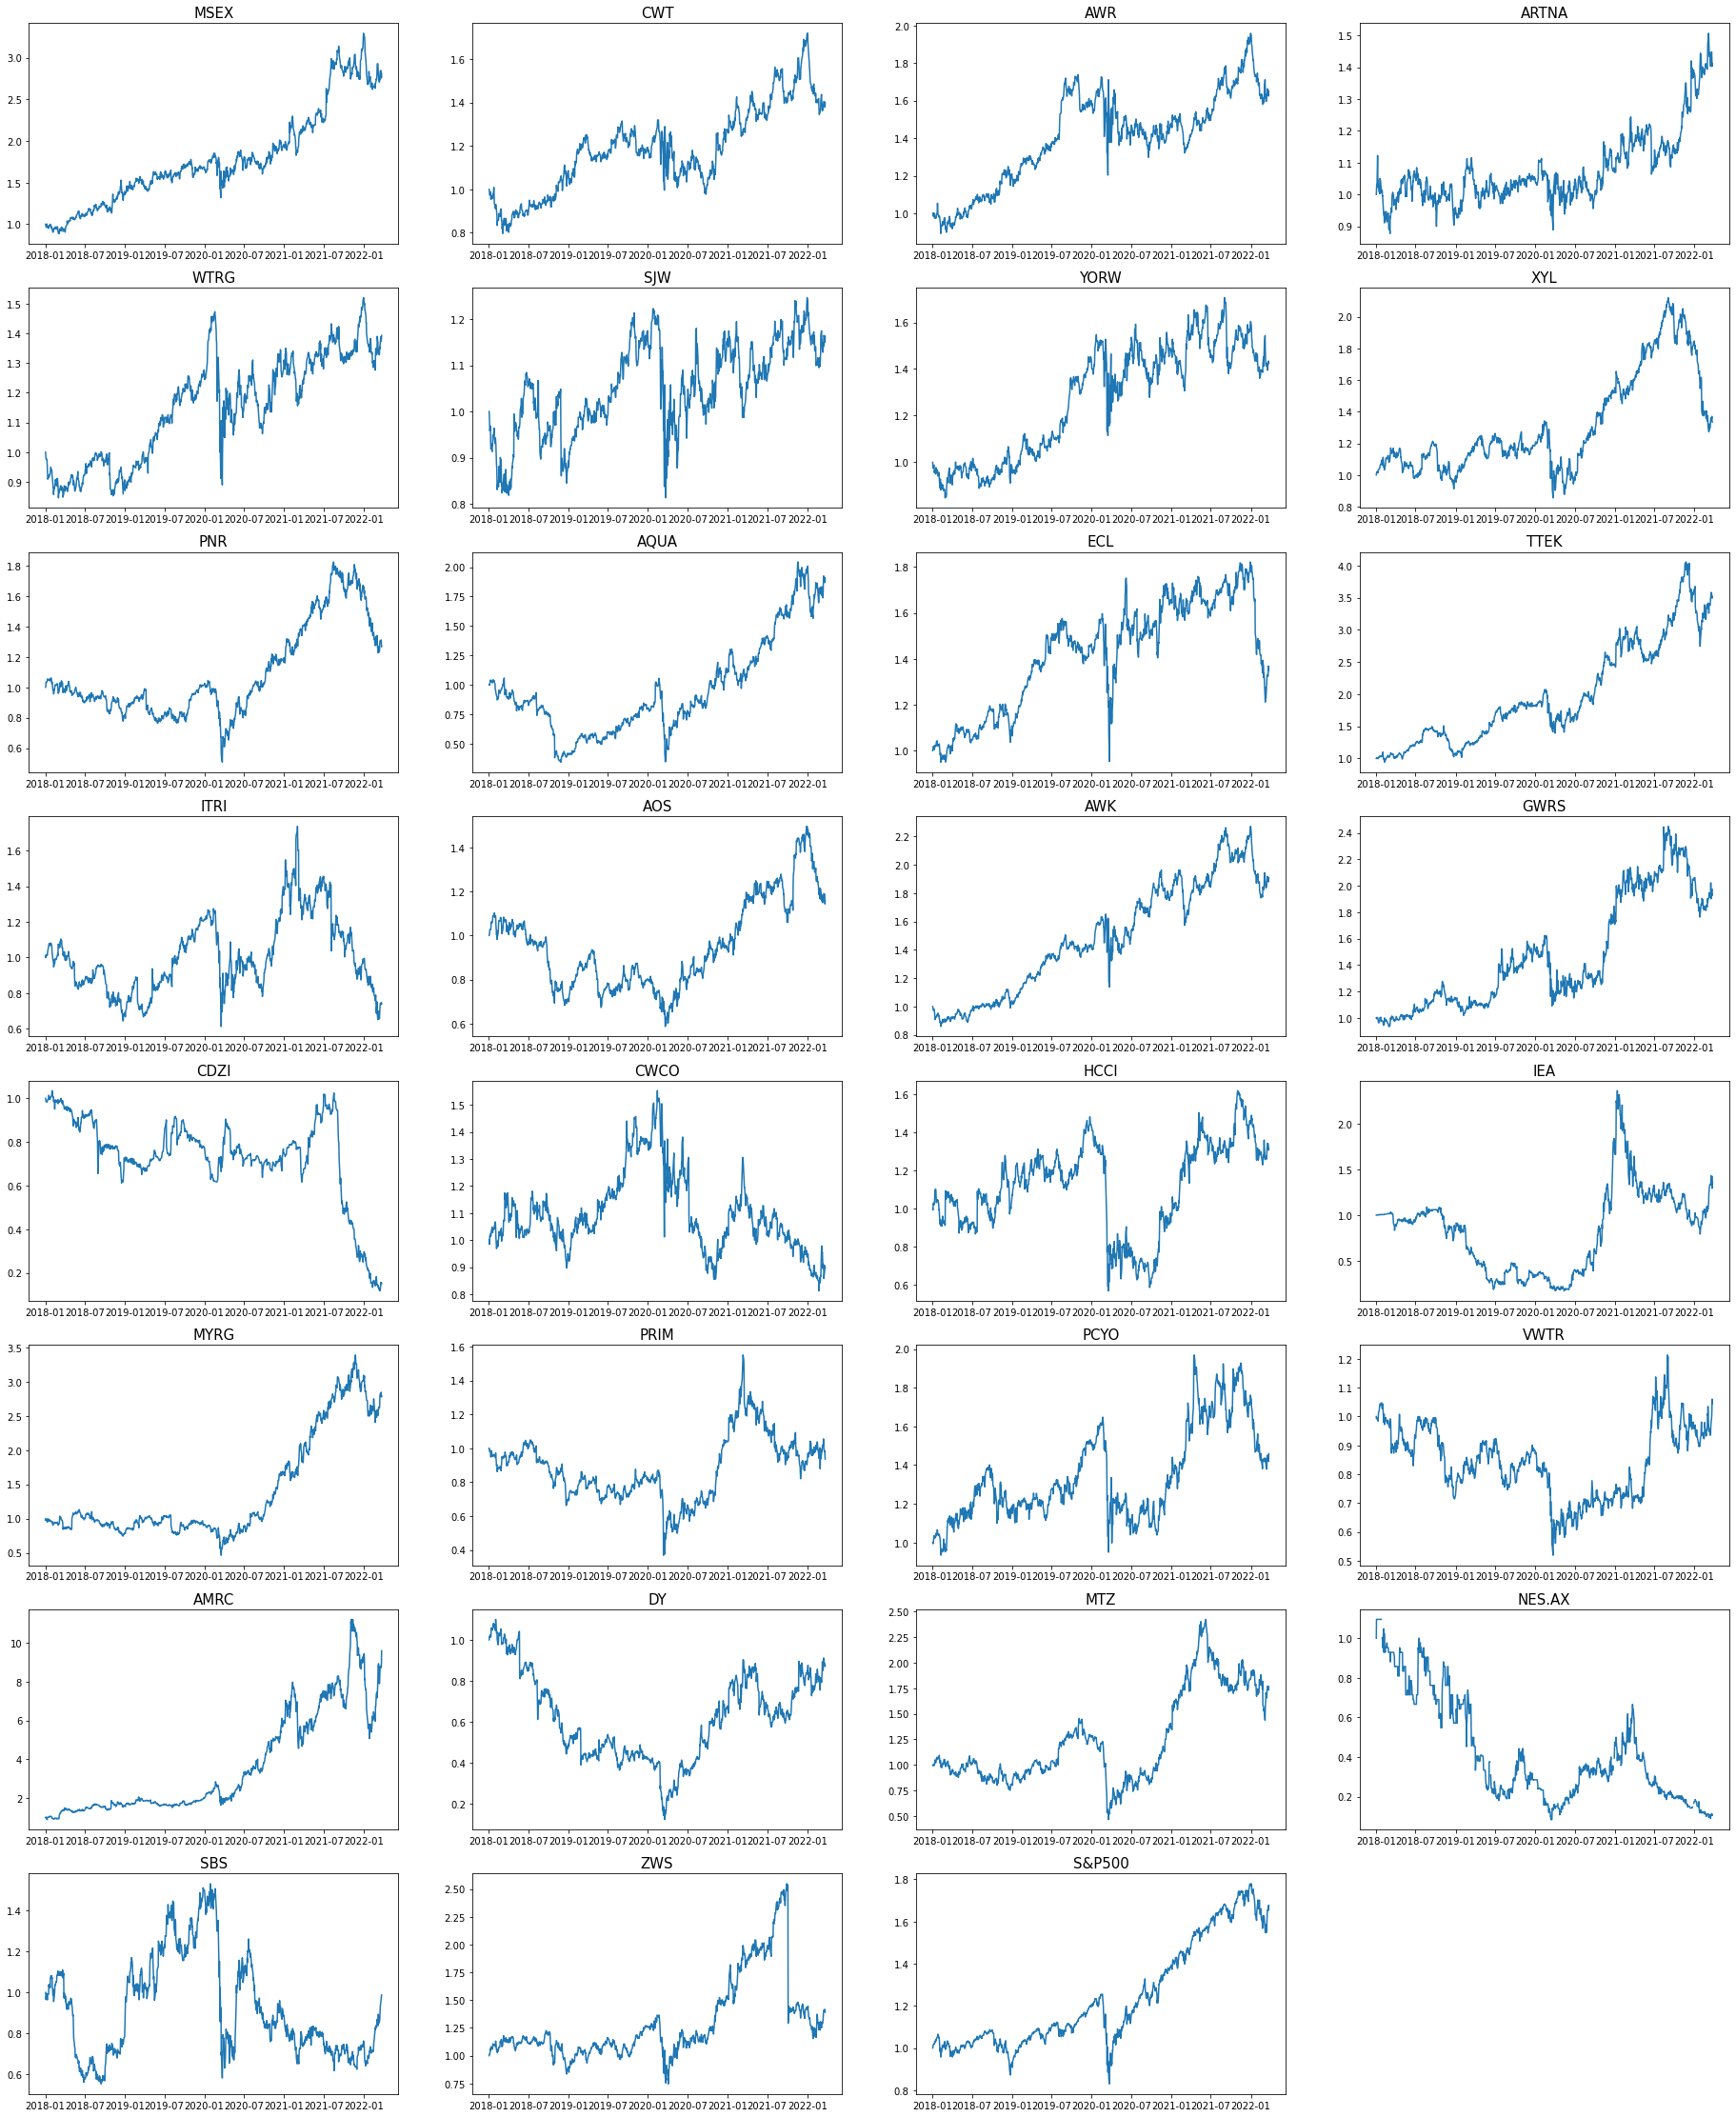

In [327]:
# create figure and axis
plt.figure(figsize=(32,40))
# plot each column
i = 1
for column in columns:
    plt.subplot(8,4,i)
    plt.plot(x_data, price_index[column], label=column)
    plt.title(column,fontsize = 15)
    i += 1
# set title and legend
plt.show()

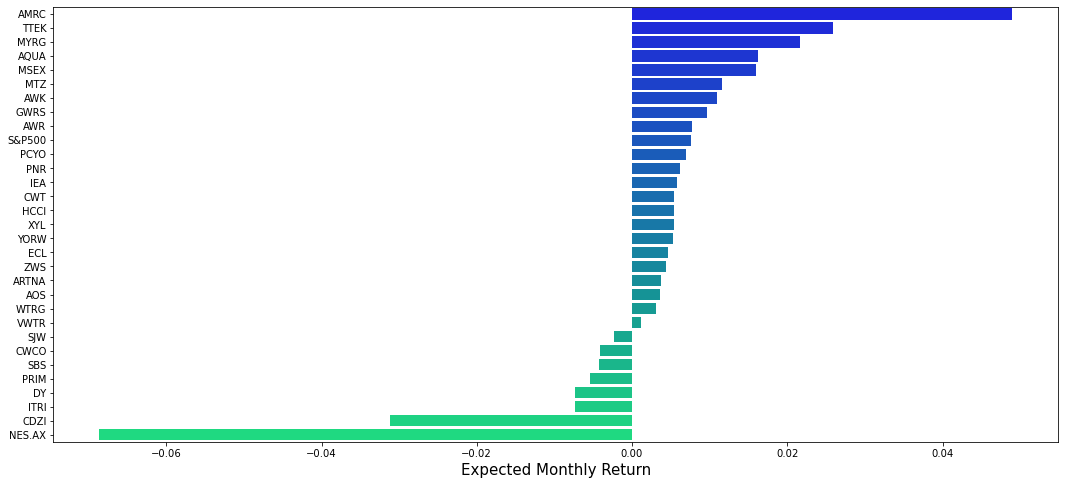

In [328]:
# Calculating Expected Monthly return 
Ex = monthly_returns.mean().to_frame().sort_values(by = 0 , ascending = False).head(40)
# barplot with order
plt.figure(figsize = (18,8))
sns.barplot(y = Ex.index, x = Ex[0],palette = 'winter')
plt.xlabel("Expected Monthly Return", fontsize = 15)
#plt.ylabel('Stock Tickers',fontsize = 15)
plt.xticks(rotation = 0,fontsize = 10)
plt.yticks(rotation = 0,fontsize = 10)
plt.show()

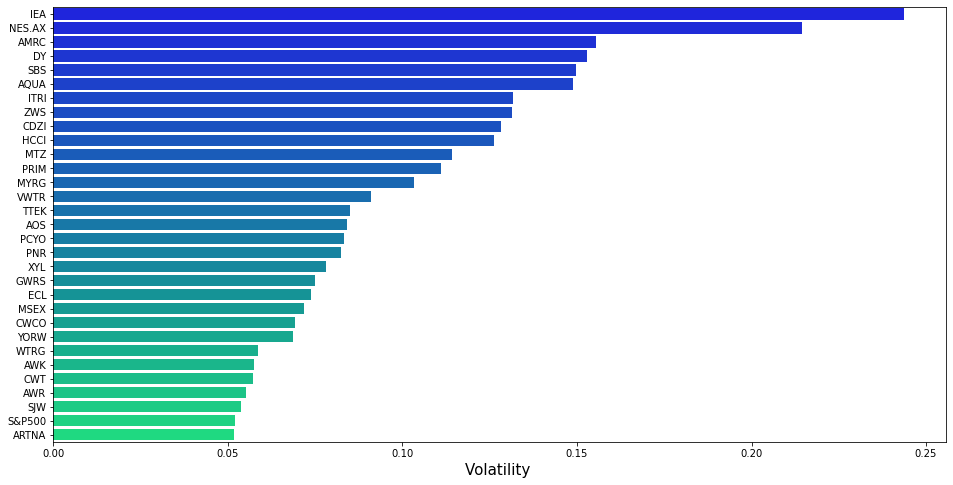

In [329]:
# barplot with order
plt.figure(figsize = (16,8))
#plt.subplot(2,1,1)
# Calculating Volatility 
Vol = monthly_returns.std().to_frame().sort_values(by = 0 , ascending = False).head(n=40)
sns.barplot(y = Vol.index, x = Vol[0],palette ="winter")
plt.xlabel("Volatility ", fontsize = 15)
#plt.ylabel('Stock Tikcers',fontsize = 15)
#plt.xticks(rotation = 0,fontsize = 10)
#plt.yticks(rotation = 0,fontsize = 10)
plt.show()

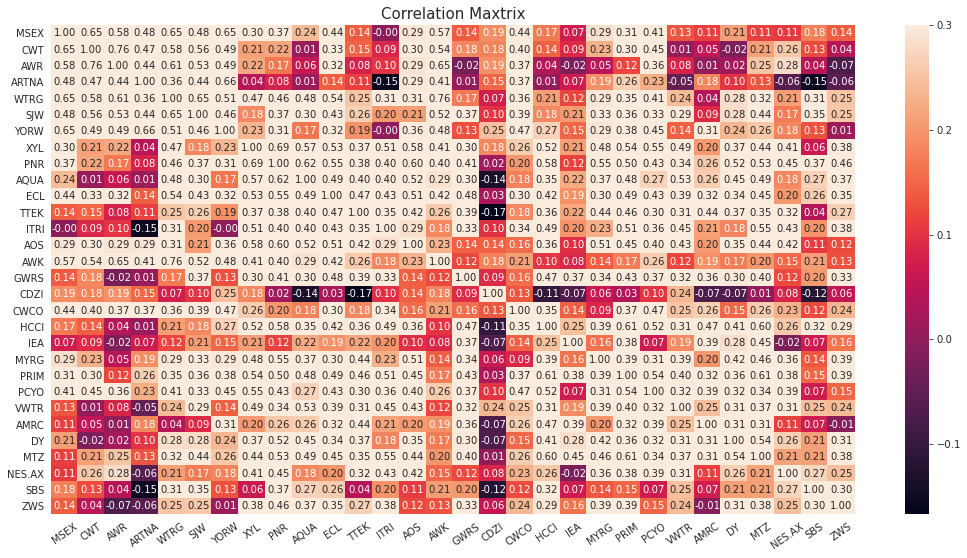

In [598]:
# Correlation
columns = list(monthly_returns.columns)
columns.remove('S&P500')
corr = monthly_returns.loc[:,columns].corr(method='pearson')

# Correlation Matrix & Highlighting the weak correlations (<= 0.25)

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr, vmax=0.3,annot=True,fmt = '.2f')
plt.title("Correlation Maxtrix", fontsize = 15)
plt.xticks(rotation = 35,fontsize = 10)
plt.show()

# Only Shows the Half of Correlation Matrix
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
#ax = sns.heatmap(corr, mask=mask, vmax=0.25,annot=True,fmt = '.2f') 

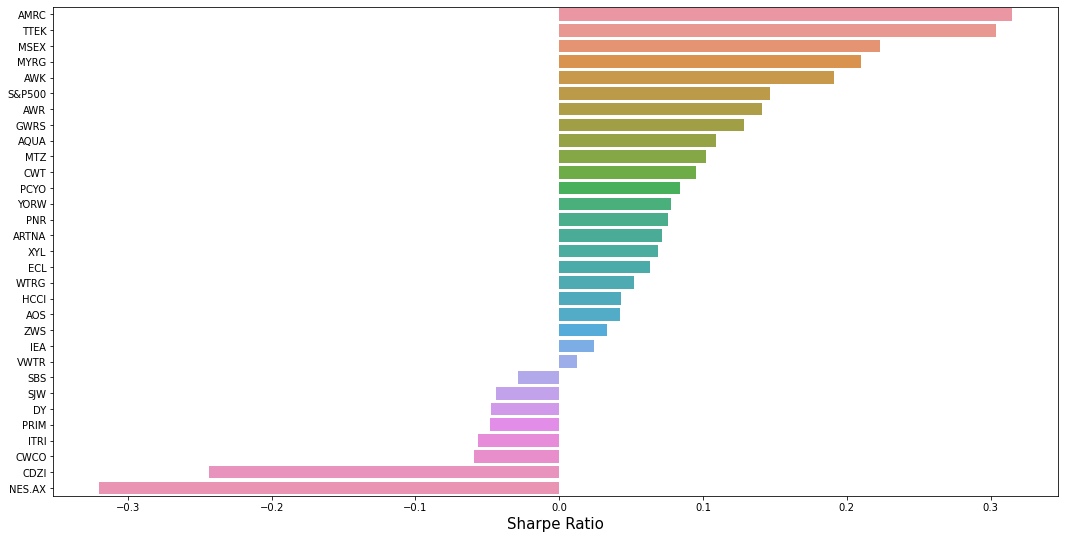

In [330]:
# 
Sr = monthly_returns.mean()/monthly_returns.std()
#
SR = Sr.to_frame().sort_values(by = 0 , ascending = False).head(50)
# barplot with order
plt.figure(figsize = (18,9))
sns.barplot(y = SR.index, x = SR[0])
plt.xlabel("Sharpe Ratio", fontsize = 15)
#plt.ylabel('Stock Tickers',fontsize = 15)
plt.xticks(rotation = 0,fontsize = 10)
plt.yticks(rotation = 0,fontsize = 10)
plt.show()

- **NES.AX**  has a high volatility and negative expected value, which should be **removed**.
- **CDZI**  has a high volatility and negative expected value, which should be **removed**
- **CWCO**  medium risk but very low expected returns should be **removed**
- **ITRI**  high volatility but has a convergent expected return of nearly zero, **keep it**
- **PRIM**  similar to ITRI (correlation = 0.51), should **remove**
- **DY**  high volatility but has a convergent expected return of nearly zero and also has low relation(0.17) with ITRI, **keep it**
- **SJW**  low expected return and medium risk  **remove**
- **SBS**  offers high risk factor and has low relations with DY and ITRI, **keep it**
- **VWTR** low Sharpe Ratio, **remove**
- **IEA** offers very high risk factor and has low relations with other risk factors, **keep it**
- **ZWS** has low correlations with other stocks, **keep it**
- **AOS** has high correlation with PNR(0.6), **remove it**

In [628]:
stock_rm = ['NES.AX','CDZI','CWCO',
            'PRIM','SJW','VWTR',"S&P500"]

In [308]:
print("AOS:",Vol.loc['AOS',:])
print("AOS:",Ex.loc['AOS',:])

AOS: 0    0.084048
Name: AOS, dtype: float64
AOS: 0    0.003566
Name: AOS, dtype: float64


In [304]:
corr.loc['ZWS','ITRI']

0.3812937053135991

In [599]:
# Create a filted portfolio
monthly_returns = daily_returns.resample('M').agg(lambda x: (x + 1).prod() - 1)
monthly_returns.drop(stock_rm,axis = 1, inplace = True)
len(monthly_returns.columns)

24

In [528]:
# Calculating Expected Returns and standard deviation
p_er = monthly_returns.mean()
p_er = p_er.append(ARIS_m.mean()) # Adding New stock(ARIS)
#p_sd = daily_returns.std()

# Covariance Matrix
p_cov = monthly_returns.cov()
# adding new stock (ARIS)
new = monthly_returns.copy()
new['ARIS'] = ARIS_m
new_cov = new.dropna(axis = 0).cov()
p_cov['ARIS'] = new_cov['ARIS']  # adding column
p_cov = p_cov.append(new_cov.loc['ARIS',:]) # adding row
p_cov.shape

(25, 25)

In [529]:
## Random number generator 
def randomNumVaccinePersonTotal(maxValue, num):
    import random
    import numpy as np
    '''Generating a serise of number that has a certain sum
    maxValue: given sum 
    num：numbers of element 

    return
    per_all_persons:list,指定 num个接种点各自待接种的人数
    '''
    maxValue = int(maxValue)
    suiji_ser = random.sample(range(1,maxValue), k=num-1) # 在1~maxValue之间，采集20个数据
    suiji_ser.append(0)   # 加上数据开头
    suiji_ser.append(maxValue)
    suiji_ser = sorted(suiji_ser)
    per_all_persons = [ suiji_ser[i]-suiji_ser[i-1] for i in range(1, len(suiji_ser)) ] 
    # 列表推导式，计算列表中每两个数之间的间隔

    return np.array(per_all_persons)

In [530]:
# allocating weights
noa = len(monthly_returns.columns)+1
weights = np.array(randomNumVaccinePersonTotal(1000,noa))
weights = weights/1000
print(weights,'sum =',sum(weights))
print("length:",noa)

[0.056 0.017 0.016 0.049 0.05  0.046 0.043 0.003 0.013 0.037 0.008 0.101
 0.005 0.027 0.026 0.025 0.043 0.034 0.157 0.001 0.13  0.06  0.002 0.033
 0.018] sum = 1.0
length: 25


In [531]:
###### Important mathematics transformation ########
# calculating the covariance of volatility 
np.dot(p_cov,weights)
np.dot(weights.T, np.dot(p_cov,weights))
np.sqrt(np.dot(weights.T, np.dot(p_cov,weights)))

0.06216776001392659

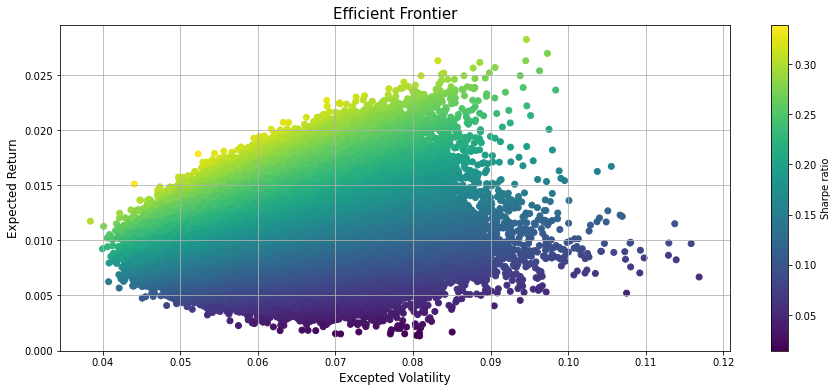

In [532]:
# Monte Carlo Simulation
port_returns = []
port_variance = []
for p in range(500000):
    weights = np.array(randomNumVaccinePersonTotal(1000,noa))
    weights = weights/1000
    port_returns.append(np.sum(p_er*weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(p_cov, weights))))

port_returns = np.array(port_returns)
port_variance = np.array(port_variance)

# Setting risk-free rate
risk_free = 0.00015
plt.figure(figsize = (15,6))
plt.scatter(port_variance, port_returns, 
            c=(port_returns-risk_free)/port_variance, marker = 'o')
plt.grid(True)
plt.xlabel('Excepted Volatility',fontsize = 12)
plt.ylabel('Expected Return',fontsize = 12)
plt.colorbar(label = 'Sharpe ratio')
plt.title("Efficient Frontier",fontsize = 15)
plt.show()

In [751]:
### No. of stocks in the portfolio
#noa = len(columns)

# defining an objective function
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.sum(p_er*weights)
    port_variance = np.sqrt(np.dot(weights.T, np.dot(p_cov,weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])

# Optimization
import scipy.optimize as sco

# Setting objective funtions: minimizing negative sharp ratio means maximizing sharp ratio
def min_sharpe(weights):
    return -statistics(weights)[2]

def min_risk(weights):
    return statistics(weights)[1]

def min_return(weights):
    return -statistics(weights)[0]

# setting contrain that make the sum of weights equals 1
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1}) # type ='eq' or 'ineq'(means inequlity)
      ### Note: here 'eq' means np.sum(weights) = 1 ###
    
# setting boundaries: each weight shound be between 0 to 1
bnds = tuple((0.03,0.1) for x in range(noa))
bnds_2 = tuple((0.03,0.1) for x in range(noa))
bnds_3 = tuple((0.03,0.1) for x in range(noa))

# Optimizing
opts = sco.minimize(min_sharpe, noa*[1./noa,], 
                   method = 'SLSQP', bounds = bnds, constraints = cons)

optv = sco.minimize(min_risk, noa*[1./noa,], 
                   method = 'SLSQP', bounds = bnds_2, constraints = cons)

optr = sco.minimize(min_return, noa*[1./noa,], 
                    method = 'SLSQP', bounds = bnds_3, constraints = cons)

#
Max_sharp = opts['x']
Min_Vol = optv['x']
Max_Return = optr['x']
#
print ("Maximum Sharpe Ratio Weights :", opts['x'] )
print ("Max Sharpe Ratio:", -opts['fun'] )
print (32*'-')
print ("Minimum Risk Weights :", optv['x'] )
print ("Minimum Volatility   :", optv['fun'] )
print (32*'-')
print ("Maximum Expected Returns :", optr['x'] )
print ("Max Expected Returns   :", -optr['fun'] )

Maximum Sharpe Ratio Weights : [0.08924289 0.03       0.03       0.03       0.03       0.03
 0.03       0.03       0.03       0.03       0.08075711 0.03
 0.03       0.03       0.03       0.03       0.03       0.03
 0.03       0.1        0.03       0.03       0.03       0.03
 0.1       ]
Max Sharpe Ratio: 0.2612992514021394
--------------------------------
Minimum Risk Weights : [0.03 0.1  0.1  0.1  0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.07
 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03]
Minimum Volatility   : 0.048313608805283556
--------------------------------
Maximum Expected Returns : [0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.1  0.03 0.03 0.03
 0.03 0.03 0.03 0.07 0.03 0.1  0.03 0.03 0.03 0.03 0.1 ]
Max Expected Returns   : 0.016969182572911523


In [752]:
# Expected Return、Expected Volatility、Max Sharp Ratio
print("Expected Monthly Return:",statistics(opts['x'])[0].round(5))
print (32*'-')
print("Expected Volatility :",statistics(opts['x'])[1].round(5))
print (32*'-')
print("Maximum Sharp Ratio :",statistics(opts['x'])[2].round(5))

Expected Monthly Return: 0.01655
--------------------------------
Expected Volatility : 0.06335
--------------------------------
Maximum Sharp Ratio : 0.2613


In [753]:
# Expected Return、Minimum Volatility、Sharp Ratio
print("Expected Monthly Return:",statistics(optv['x'])[0].round(5))
print (32*'-')
print("Minimum Volatility :",statistics(optv['x'])[1].round(5))
print (32*'-')
print("Sharp Ratio :",statistics(optv['x'])[2].round(5))

Expected Monthly Return: 0.00929
--------------------------------
Minimum Volatility : 0.04831
--------------------------------
Sharp Ratio : 0.19225


In [754]:
# Max Expected Return、Volatility、Sharp Ratio
print("Max Expected Monthly Return:",statistics(optr['x'])[0].round(5))
print (32*'-')
print("Volatility :",statistics(optr['x'])[1].round(5))
print (32*'-')
print("Sharp Ratio :",statistics(optr['x'])[2].round(5))

Max Expected Monthly Return: 0.01697
--------------------------------
Volatility : 0.0656
--------------------------------
Sharp Ratio : 0.25866


In [564]:
# Minimize Variances under different target returns
target_returns = np.linspace(0.002,0.017,50) 
target_variance = []
bnds = tuple((0.03,0.1) for x in range(noa))
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},
            {'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_risk, noa*[1./noa,],
                       method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])

target_variance = np.array(target_variance)

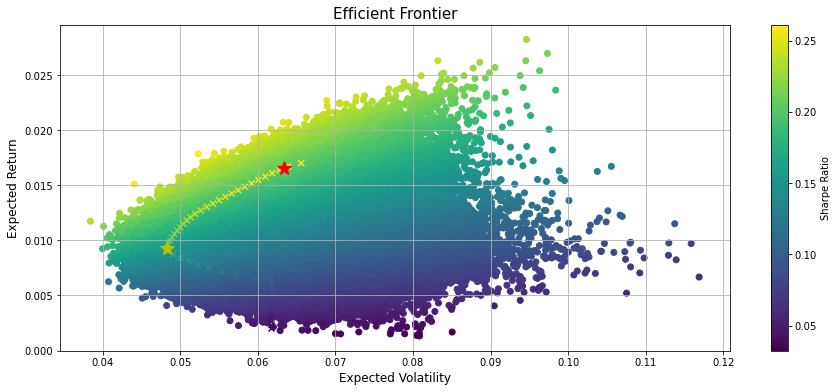

In [565]:
# Visualizing optimal results with yellow and red Stars
plt.figure(figsize = (15,6))
# Drawing Monte Carlo Simulations 
plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')
# Crosses：Portfolio efficient frontier
plt.scatter(target_variance,target_returns, 
            c = target_returns/target_variance, marker = 'x')
# Red Stars：Portfolio with Maximum Sharp Ratio
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
# Yellow Star：Portfolio with Minimum Variance
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('Expected Volatility',fontsize = 12)
plt.ylabel('Expected Return',fontsize = 12)
plt.colorbar(label = 'Sharpe Ratio')
plt.title("Efficient Frontier",fontsize = 15)
plt.show()

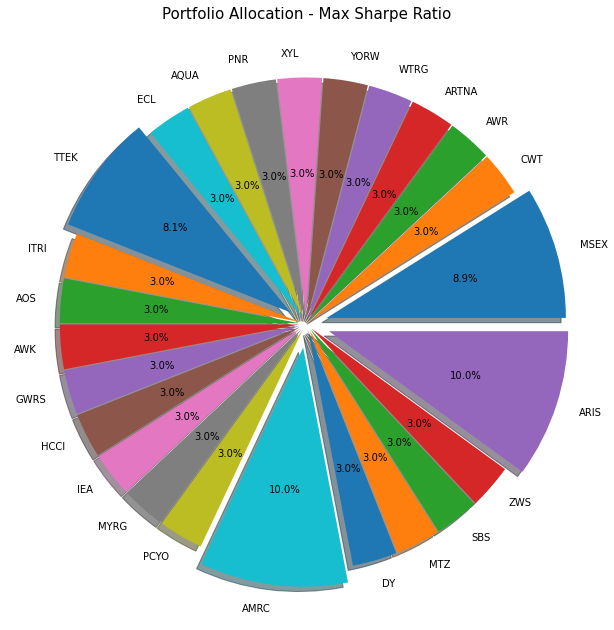

In [591]:
# Portfolio Allocation_1
plt.figure(figsize = (25,11))
plt.pie(Max_sharp,labels= p_cov.columns,explode = Max_sharp
        ,autopct='%1.1f%%', shadow= True)
plt.title("Portfolio Allocation - Max Sharpe Ratio",fontsize = 15)
plt.show()

- Big Portion: ARIS(10%), AMRC(10%), MSEK(8.9%), TTEK(8.1%)

<ipython-input-601-d4296a35a681>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(Min_Vol,labels= p_cov.columns,explode = Min_Vol


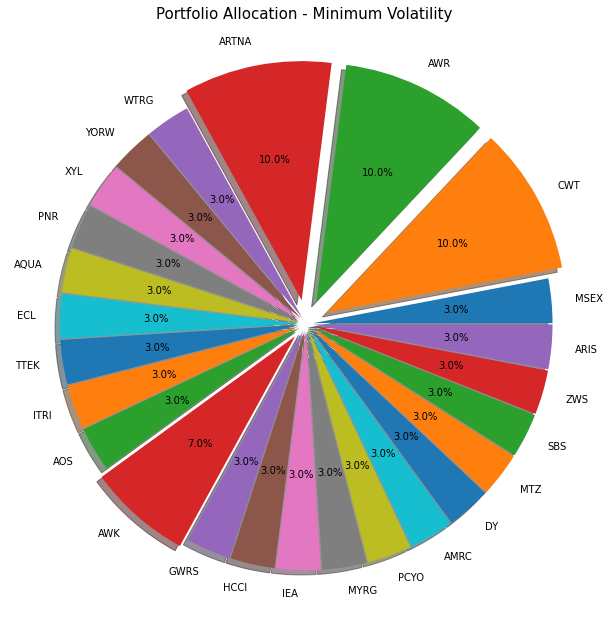

In [601]:
# Portfolio Allocation_2
plt.figure(figsize = (25,11))
plt.pie(Min_Vol,labels= p_cov.columns,explode = Min_Vol
        ,autopct='%1.1f%%', shadow= True)
plt.title("Portfolio Allocation - Minimum Volatility ",fontsize = 15)
plt.show()

- Big Portion: ARTNA(10%), AWR(10%), CWT(10%), AWK(7%) 

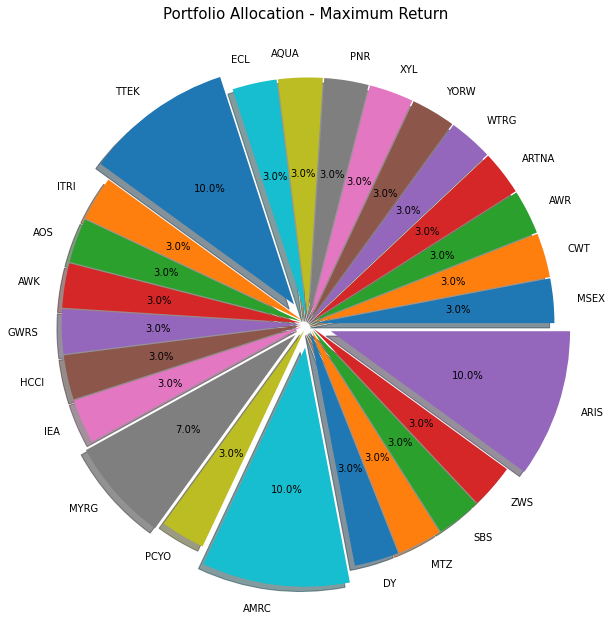

In [600]:
# Portfolio Allocation_3
plt.figure(figsize = (25,11))
plt.pie(Max_Return,labels= p_cov.columns,explode = Max_Return
        ,autopct='%1.1f%%', shadow= True)
plt.title("Portfolio Allocation - Maximum Return ",fontsize = 15)
plt.show()

- Big Portion: TTEK(10%), ARIS(10%), AMRC(10%), MYRG(7%) 

In [748]:
# compare with benchmark
stock_rm = ['NES.AX','CDZI','CWCO',
            'PRIM','SJW','VWTR','S&P500']
pf = daily_returns.copy()
pf['ARIS'] = ARIS_d
pf = pf.drop(stock_rm,axis = 1)
pf = pf.dropna(axis = 0)

#
data_max_s = []
data_min_vol = []
data_max_r = []
for i in range(len(pf)):
    data_max_s.append(sum(pf.iloc[i,:]*Max_sharp))
    data_min_vol.append(sum(pf.iloc[i,:]*Min_Vol))
    data_max_r.append(sum(pf.iloc[i,:]*Max_Return))

#
pf['Portfolio_Max_Sp'] = data_max_s
pf['Portfolio_Min_Vlt'] = data_min_vol
pf['Portfolio_Max_Ret'] = data_max_r
pf['S&P500'] = daily_returns['S&P500']
#
pf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2021-10-25 to 2022-03-24
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSEX               98 non-null     float64
 1   CWT                98 non-null     float64
 2   AWR                98 non-null     float64
 3   ARTNA              98 non-null     float64
 4   WTRG               98 non-null     float64
 5   YORW               98 non-null     float64
 6   XYL                98 non-null     float64
 7   PNR                98 non-null     float64
 8   AQUA               98 non-null     float64
 9   ECL                98 non-null     float64
 10  TTEK               98 non-null     float64
 11  ITRI               98 non-null     float64
 12  AOS                98 non-null     float64
 13  AWK                98 non-null     float64
 14  GWRS               98 non-null     float64
 15  HCCI               98 non-null     float64
 16  IEA     

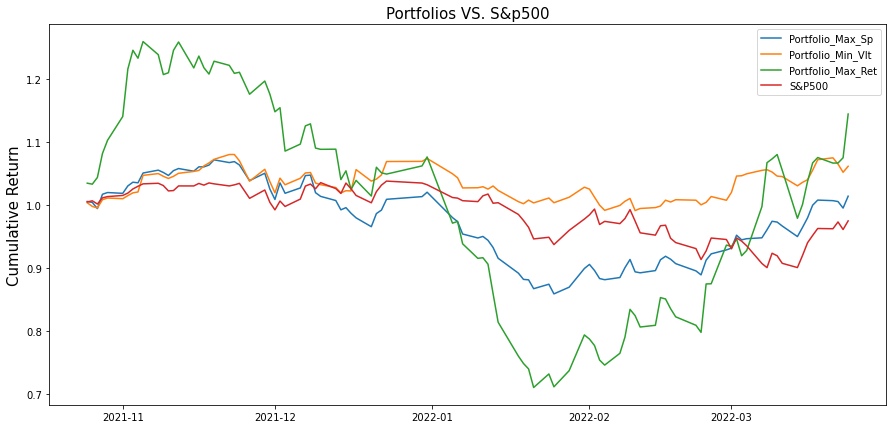

In [778]:
# Calculating cumulative Portfolio Returns 
cumulative_ret_1= (pf['Portfolio_Max_Sp']+1).cumprod()
cumulative_ret_2= (pf['Portfolio_Min_Vlt']+1).cumprod()
cumulative_ret_3= (pf['Portfolio_Max_Ret']+1).cumprod()
cumulative_ret_Sp500 =(pf['S&P500']+1).cumprod()

# Visualizing portfolios
plt.figure(figsize=(15,7))
plt.subplot()
plt.plot(cumulative_ret_1.index,cumulative_ret_1,label ='Portfolio_Max_Sp')
plt.plot(cumulative_ret_2.index,cumulative_ret_2,label ='Portfolio_Min_Vlt')
plt.plot(cumulative_ret_3,label ='Portfolio_Max_Ret')
plt.plot(cumulative_ret_Sp500,label = 'S&P500')
plt.ylabel('Cumulative Return',fontsize = 15)
plt.title("Portfolios VS. S&p500",fontsize =15)
plt.legend()
plt.show()